In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# **finding corners of chessboard**

In [ ]:
!unzip /content/label-v03.zip

Archive:  /content/label-v03.zip
   creating: label-v03/
   creating: label-v03/test/
   creating: label-v03/test/images/
  inflating: label-v03/test/images/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg  
  inflating: label-v03/test/images/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg  
  inflating: label-v03/test/images/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3df41a9e0c.jpg  
  inflating: label-v03/test/images/410993714e325a1de3e394ffe860df3a_jpg.rf.657c49ca295ef54da23469189070a075.jpg  
  inflating: label-v03/test/images/4e3117459d759798537eb52cf5bf534d_jpg.rf.ec961b62d4b0e131fae760ed1f80836b.jpg  
  inflating: label-v03/test/images/5a35ba2ec3e0d0b2b12b1758a8ac29aa_jpg.rf.9dbdb057f6533c0c09c0eda0747fbc9e.jpg  
  inflating: label-v03/test/images/654bb8835258b26c466b1c19893df451_jpg.rf.55fb7f23a4422a80793f01e152fabe4d.jpg  
  inflating: label-v03/test/images/685b860d412b91f5d4f7f9e643b84452_jpg.rf.2d781

In [ ]:
import os
import ast
import numpy as np
import cv2

#--------------------------------------------------------------------- reading dataset of 4 corner coordinate
def data_reader(image_folder,text_folder):
  targets = []
  images = []
  for filename1 in os.listdir(image_folder):
    img = cv2.imread(image_folder+'/'+filename1)
    fileName = filename1.split(".jpg")[-2]
    txtName = text_folder+'/'+fileName+".txt"
    # txtName = fileName + ".txt"
    f = open(txtName, 'r')
    cordinates = f.readlines()
    f.close()
    x1,y1 = ast.literal_eval(cordinates[0])
    x2,y2 = ast.literal_eval(cordinates[1])
    x3,y3 = ast.literal_eval(cordinates[2])
    x4,y4 = ast.literal_eval(cordinates[3])
    corners = np.asarray([x1,y1,x2,y2,x3,y3,x4,y4])

    targets.append(corners)
    images.append(img)

  images = np.asarray(images)
  images = images/255.0
  return targets , images

image_folder = '/content/label-v03/train/images'
text_folder = '/content/label-v03/train/labels'
train_target , train_images = data_reader(image_folder,text_folder)

image_folder = '/content/label-v03/test/images'
text_folder = '/content/label-v03/test/labels'
test_target , test_images = data_reader(image_folder,text_folder)

In [ ]:
# number_of_train = int(0.7*images.shape[0])
# train_images = images[:number_of_train]
# test_images = images[number_of_train:]

# train_target = targets[:number_of_train]
# test_target = targets[number_of_train:]

In [ ]:
#--------------------------------------------------------------------- making dataset tensor
import tensorflow as tf
train_target = tf.convert_to_tensor(train_target)
test_target = tf.convert_to_tensor(test_target)

test_images = tf.convert_to_tensor(test_images)
train_images = tf.convert_to_tensor(train_images)

In [ ]:
#--------------------------------------------------------------------- define model architecture
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(416, 416, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(8))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 414, 414, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 207, 207, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 205, 205, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 102, 102, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 100, 100, 16)      4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 50, 50, 16)       0

In [ ]:
# # Define the loss function
# loss_fn = tf.keras.losses.MeanSquaredError()

# # Define the optimizer
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

In [ ]:
# # chatGBT
# # Perform a forward pass
# with tf.GradientTape() as tape:
#     output = model(train_images)
#     loss_value = loss_fn(train_target, output)

# # Print the output
# print(output)

# # Calculate the gradients and update the model weights
# grads = tape.gradient(loss_value, model.trainable_variables)
# optimizer.apply_gradients(zip(grads, model.trainable_variables))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
batch_size = 40
epochs = 200
model.fit(train_images, train_target, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Save the model
model.save('corner_detection_model20.h5')

Epoch 1/200
10/10 [==============================] - 19s 455ms/step - loss: 35756.1914 - val_loss: 11080.9961
Epoch 2/200
10/10 [==============================] - 2s 154ms/step - loss: 4524.2935 - val_loss: 3119.5925
Epoch 3/200
10/10 [==============================] - 3s 346ms/step - loss: 1960.1987 - val_loss: 988.2650
Epoch 4/200
10/10 [==============================] - 3s 290ms/step - loss: 1242.4624 - val_loss: 1103.7202
Epoch 5/200
10/10 [==============================] - 2s 185ms/step - loss: 944.4123 - val_loss: 761.3845
Epoch 6/200
10/10 [==============================] - 2s 209ms/step - loss: 797.7161 - val_loss: 626.0749
Epoch 7/200
10/10 [==============================] - 3s 332ms/step - loss: 592.6180 - val_loss: 731.7292
Epoch 8/200
10/10 [==============================] - 3s 357ms/step - loss: 497.1513 - val_loss: 424.6218
Epoch 9/200
10/10 [==============================] - 3s 261ms/step - loss: 313.7795 - val_loss: 317.3509
Epoch 10/200
10/10 [=========================

In [ ]:
#--------------------------------------------------------------------- load above saved model
model = tf.keras.models.load_model('final_corner_detection_model.h5')

In [ ]:
#--------------------------------------------------------------------- make prediction
predicted = model.predict(test_images)


1/1 [==============================] - 9s 9s/step


In [ ]:
#--------------------------------------------------------------------- calculating model prediction accuracy (MSE, MAE and R2)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(test_target, predicted)
mae = mean_absolute_error(test_target, predicted)
r2 = r2_score(test_target, predicted)

print('MSE:', mse)
print('MAE:', mae)
print('R2 score:', r2)

MSE: 9.323127535001024
MAE: 2.4931798721181937
R2 score: 0.41626940460017436


In [ ]:

predicted_train = model.predict(train_images)

mse = mean_squared_error(train_target, predicted_train)
mae = mean_absolute_error(train_target, predicted_train)
r2 = r2_score(train_target, predicted_train)

print('MSE:', mse)
print('MAE:', mae)
print('R2 score:', r2)

13/13 [==============================] - 2s 112ms/step
MSE: 6.241459336512126
MAE: 1.7285314779819514
R2 score: 0.9621587628029057


# **Making 2D image**

In [ ]:
######################################################################### finding corners with previous trained model

#-------------- PreProcessing and predict
image_path = '20.jpg'
img = cv2.imread(image_path)
img = img/255.0
img = img.reshape(1,416,416,3)
test = tf.convert_to_tensor(img)
results = model.predict(test)

#-------------- convert predicts to cordinates
corners = results.copy()
corners = corners.reshape((4, 2))

print(results)
print("shape of results:", results.shape)
print("type of results:", type(results))

print(corners)
print("shape of corners:", corners.shape)
print("type of corners:", type(corners))

#-------------- order corners to standard arrange
def order_points(pts):

    # order a list of 4 coordinates:
    # 0: top-left,
    # 1: top-right
    # 2: bottom-right,
    # 3: bottom-left

    rect = np.zeros((4, 2), dtype = "float32")
    s = pts.sum(axis = 1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]

    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]

    return rect

1/1 [==============================] - 0s 54ms/step
[[     63.169      32.743      312.84      35.434      380.14      367.37      29.118      376.41]]
shape of results: (1, 8)
type of results: <class 'numpy.ndarray'>
[[     63.169      32.743]
 [     312.84      35.434]
 [     380.14      367.37]
 [     29.118      376.41]]
shape of corners: (4, 2)
type of corners: <class 'numpy.ndarray'>


In [ ]:
#------------------------------------------------------------- finding prespective transform
import matplotlib.image as image
from PIL import Image


def four_point_transform(image, pts):

    img = Image.open(image)
    image = np.asarray(img)
    rect = order_points(pts)
    (tl, tr, br, bl) = rect

    # compute the width of the new image
    widthA = np.sqrt(((br[0] - bl[0]) ** 2) + ((br[1] - bl[1]) ** 2))
    widthB = np.sqrt(((tr[0] - tl[0]) ** 2) + ((tr[1] - tl[1]) ** 2))
    maxWidth = max(int(widthA), int(widthB))

    print(maxWidth)

    # compute the height of the new image
    heightA = np.sqrt(((tr[0] - br[0]) ** 2) + ((tr[1] - br[1]) ** 2))
    heightB = np.sqrt(((tl[0] - bl[0]) ** 2) + ((tl[1] - bl[1]) ** 2))
    maxHeight = max(int(heightA), int(heightB))

    # construct set of destination points to obtain a "birds eye view"
    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype = "float32")

    # compute the perspective transform matrix and then apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    img = Image.fromarray(warped, "RGB")
    # img.show()
    # return the warped image
    return img

transformed_image = four_point_transform(image_path, corners)
print(transformed_image)

351
<PIL.Image.Image image mode=RGB size=351x345 at 0x7FDB782E7AC0>


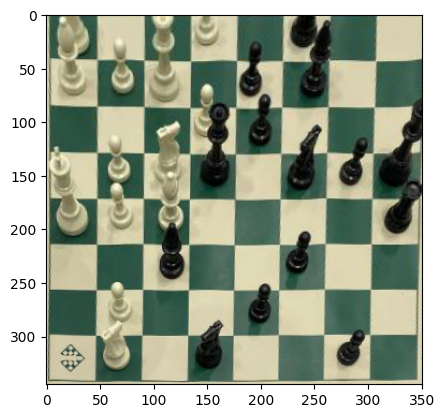

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(transformed_image)

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.image as image
from matplotlib import pyplot as plt


import pandas as pd
import numpy as np
from numpy import asarray
from PIL import Image

import cv2

from shapely.geometry import Polygon

In [ ]:
#-------------------------- calculates chessboard edge grid

from matplotlib.pyplot import figure

def plot_grid_on_transformed_image(image):

    corners = np.array([[0,0],
                    [image.size[0], 0],
                    [0, image.size[1]],
                    [image.size[0], image.size[1]]])

    corners = order_points(corners)

    figure(figsize=(10, 10), dpi=80)

    # im = plt.imread(image)
    implot = plt.imshow(image)

    TL = corners[0]
    BL = corners[3]
    TR = corners[1]
    BR = corners[2]

    print(TL)
    print(TR)
    print(BL)

    def interpolate(xy0, xy1):
        x0,y0 = xy0
        x1,y1 = xy1
        dx = (x1-x0) / 8
        dy = (y1-y0) / 8
        pts = [(x0+i*dx,y0+i*dy) for i in range(9)]
        return pts

    ptsT = interpolate( TL, TR )
    ptsL = interpolate( TL, BL )
    ptsR = interpolate( TR, BR )
    ptsB = interpolate( BL, BR )

    for a,b in zip(ptsL, ptsR):
        plt.plot( [a[0], b[0]], [a[1], b[1]], 'ro', linestyle="--" )
        # print(a)
        # print(b)
    for a,b in zip(ptsT, ptsB):
        plt.plot( [a[0], b[0]], [a[1], b[1]], 'ro', linestyle="--" )

    plt.axis('off')

    plt.savefig('chessboard_transformed_with_grid.jpg')
    return ptsT, ptsL

[          0           0]
[        351           0]
[          0         345]


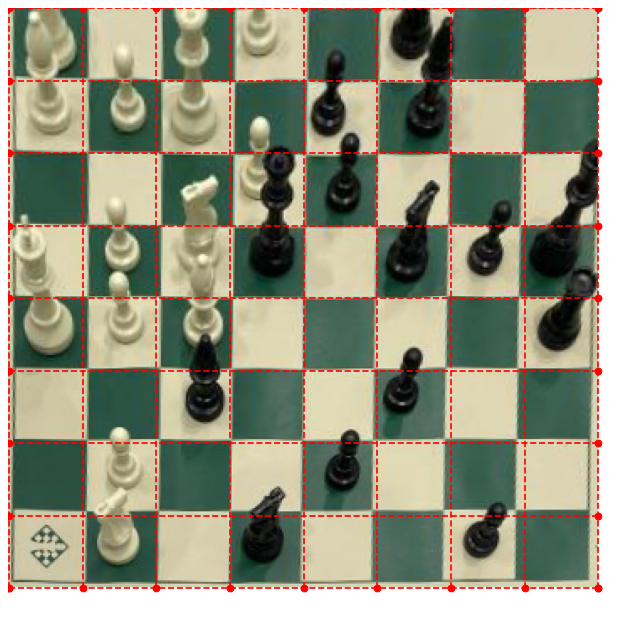

In [ ]:
ptsT, ptsL = plot_grid_on_transformed_image(transformed_image)

#----------------------calculate grid and square
xA = ptsT[0][0]
xB = ptsT[1][0]
xC = ptsT[2][0]
xD = ptsT[3][0]
xE = ptsT[4][0]
xF = ptsT[5][0]
xG = ptsT[6][0]
xH = ptsT[7][0]
xI = ptsT[8][0]

y9 = ptsL[0][1]
y8 = ptsL[1][1]
y7 = ptsL[2][1]
y6 = ptsL[3][1]
y5 = ptsL[4][1]
y4 = ptsL[5][1]
y3 = ptsL[6][1]
y2 = ptsL[7][1]
y1 = ptsL[8][1]

a8 = np.array([[xA,y9], [xB, y9], [xB, y8], [xA, y8]])
a7 = np.array([[xA,y8], [xB, y8], [xB, y7], [xA, y7]])
a6 = np.array([[xA,y7], [xB, y7], [xB, y6], [xA, y6]])
a5 = np.array([[xA,y6], [xB, y6], [xB, y5], [xA, y5]])
a4 = np.array([[xA,y5], [xB, y5], [xB, y4], [xA, y4]])
a3 = np.array([[xA,y4], [xB, y4], [xB, y3], [xA, y3]])
a2 = np.array([[xA,y3], [xB, y3], [xB, y2], [xA, y2]])
a1 = np.array([[xA,y2], [xB, y2], [xB, y1], [xA, y1]])

b8 = np.array([[xB,y9], [xC, y9], [xC, y8], [xB, y8]])
b7 = np.array([[xB,y8], [xC, y8], [xC, y7], [xB, y7]])
b6 = np.array([[xB,y7], [xC, y7], [xC, y6], [xB, y6]])
b5 = np.array([[xB,y6], [xC, y6], [xC, y5], [xB, y5]])
b4 = np.array([[xB,y5], [xC, y5], [xC, y4], [xB, y4]])
b3 = np.array([[xB,y4], [xC, y4], [xC, y3], [xB, y3]])
b2 = np.array([[xB,y3], [xC, y3], [xC, y2], [xB, y2]])
b1 = np.array([[xB,y2], [xC, y2], [xC, y1], [xB, y1]])

c8 = np.array([[xC,y9], [xD, y9], [xD, y8], [xC, y8]])
c7 = np.array([[xC,y8], [xD, y8], [xD, y7], [xC, y7]])
c6 = np.array([[xC,y7], [xD, y7], [xD, y6], [xC, y6]])
c5 = np.array([[xC,y6], [xD, y6], [xD, y5], [xC, y5]])
c4 = np.array([[xC,y5], [xD, y5], [xD, y4], [xC, y4]])
c3 = np.array([[xC,y4], [xD, y4], [xD, y3], [xC, y3]])
c2 = np.array([[xC,y3], [xD, y3], [xD, y2], [xC, y2]])
c1 = np.array([[xC,y2], [xD, y2], [xD, y1], [xC, y1]])

d8 = np.array([[xD,y9], [xE, y9], [xE, y8], [xD, y8]])
d7 = np.array([[xD,y8], [xE, y8], [xE, y7], [xD, y7]])
d6 = np.array([[xD,y7], [xE, y7], [xE, y6], [xD, y6]])
d5 = np.array([[xD,y6], [xE, y6], [xE, y5], [xD, y5]])
d4 = np.array([[xD,y5], [xE, y5], [xE, y4], [xD, y4]])
d3 = np.array([[xD,y4], [xE, y4], [xE, y3], [xD, y3]])
d2 = np.array([[xD,y3], [xE, y3], [xE, y2], [xD, y2]])
d1 = np.array([[xD,y2], [xE, y2], [xE, y1], [xD, y1]])

e8 = np.array([[xE,y9], [xF, y9], [xF, y8], [xE, y8]])
e7 = np.array([[xE,y8], [xF, y8], [xF, y7], [xE, y7]])
e6 = np.array([[xE,y7], [xF, y7], [xF, y6], [xE, y6]])
e5 = np.array([[xE,y6], [xF, y6], [xF, y5], [xE, y5]])
e4 = np.array([[xE,y5], [xF, y5], [xF, y4], [xE, y4]])
e3 = np.array([[xE,y4], [xF, y4], [xF, y3], [xE, y3]])
e2 = np.array([[xE,y3], [xF, y3], [xF, y2], [xE, y2]])
e1 = np.array([[xE,y2], [xF, y2], [xF, y1], [xE, y1]])

f8 = np.array([[xF,y9], [xG, y9], [xG, y8], [xF, y8]])
f7 = np.array([[xF,y8], [xG, y8], [xG, y7], [xF, y7]])
f6 = np.array([[xF,y7], [xG, y7], [xG, y6], [xF, y6]])
f5 = np.array([[xF,y6], [xG, y6], [xG, y5], [xF, y5]])
f4 = np.array([[xF,y5], [xG, y5], [xG, y4], [xF, y4]])
f3 = np.array([[xF,y4], [xG, y4], [xG, y3], [xF, y3]])
f2 = np.array([[xF,y3], [xG, y3], [xG, y2], [xF, y2]])
f1 = np.array([[xF,y2], [xG, y2], [xG, y1], [xF, y1]])

g8 = np.array([[xG,y9], [xH, y9], [xH, y8], [xG, y8]])
g7 = np.array([[xG,y8], [xH, y8], [xH, y7], [xG, y7]])
g6 = np.array([[xG,y7], [xH, y7], [xH, y6], [xG, y6]])
g5 = np.array([[xG,y6], [xH, y6], [xH, y5], [xG, y5]])
g4 = np.array([[xG,y5], [xH, y5], [xH, y4], [xG, y4]])
g3 = np.array([[xG,y4], [xH, y4], [xH, y3], [xG, y3]])
g2 = np.array([[xG,y3], [xH, y3], [xH, y2], [xG, y2]])
g1 = np.array([[xG,y2], [xH, y2], [xH, y1], [xG, y1]])

h8 = np.array([[xH,y9], [xI, y9], [xI, y8], [xH, y8]])
h7 = np.array([[xH,y8], [xI, y8], [xI, y7], [xH, y7]])
h6 = np.array([[xH,y7], [xI, y7], [xI, y6], [xH, y6]])
h5 = np.array([[xH,y6], [xI, y6], [xI, y5], [xH, y5]])
h4 = np.array([[xH,y5], [xI, y5], [xI, y4], [xH, y4]])
h3 = np.array([[xH,y4], [xI, y4], [xI, y3], [xH, y3]])
h2 = np.array([[xH,y3], [xI, y3], [xI, y2], [xH, y2]])
h1 = np.array([[xH,y2], [xI, y2], [xI, y1], [xH, y1]])

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!yolo task=detect mode=predict model= best.pt conf=0.25 source=image_path save=True

2023-07-10 17:20:30.497176: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130615 parameters, 0 gradients, 28.5 GFLOPs
image 1/1 /content/20.jpg: 800x800 2 black-bishops, 1 black-king, 2 black-knights, 6 black-pawns, 1 black-queen, 2 black-rooks, 2 white-bishops, 1 white-king, 2 white-knights, 6 white-pawns, 1 white-queen, 1 white-rook, 24.8ms
Speed: 1.0ms pre-process, 24.8ms inference, 130.4ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict2


In [ ]:
objectdetector_model = YOLO('best.pt')
results = objectdetector_model.predict(transformed_image)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11130615 parameters, 0 gradients, 28.5 GFLOPs


In [ ]:
boxes = results[0].boxes
print(boxes)

# Move the tensor to CPU
boxes_cpu = boxes.cpu()
print(boxes_cpu)

# Convert the CPU tensor to numpy array
detections = boxes_cpu.xyxy.numpy()
print(detections)

tensor([[103.00000, 192.00000, 132.00000, 251.00000,   0.89904,   1.00000],
        [ 93.00000,   0.00000, 128.00000,  85.00000,   0.88761,  11.00000],
        [136.00000,   0.00000, 164.00000,  34.00000,   0.88675,  10.00000],
        [142.00000,  79.00000, 176.00000, 165.00000,   0.87570,   5.00000],
        [ 54.00000, 247.00000,  79.00000, 288.00000,   0.86790,  10.00000],
        [101.00000, 145.00000, 130.00000, 205.00000,   0.86767,   7.00000],
        [ 54.00000, 155.00000,  81.00000, 203.00000,   0.86562,  10.00000],
        [ 53.00000, 109.00000,  79.00000, 160.00000,   0.86259,  10.00000],
        [ 47.00000, 284.00000,  79.00000, 335.00000,   0.86028,   9.00000],
        [ 98.00000,  97.00000, 129.00000, 161.00000,   0.85468,   9.00000],
        [322.00000, 153.00000, 351.00000, 209.00000,   0.85396,   6.00000],
        [ 55.00000,  19.00000,  84.00000,  78.00000,   0.85242,  10.00000],
        [315.00000,  72.00000, 351.00000, 165.00000,   0.84688,   2.00000],
        [239

In [ ]:
# calculates iou between two polygons
from shapely.geometry import Polygon

def calculate_iou(box_1, box_2):
    poly_1 = Polygon(box_1)
    poly_2 = Polygon(box_2)
    iou = poly_1.intersection(poly_2).area / poly_1.union(poly_2).area
    return iou

In [ ]:
# connects detected piece to the right square

def connect_square_to_detection(detections, square):

    di = {1: 'b', 2: 'k', 3: 'n',
      4: 'p', 5: 'q', 6: 'r',
      7: 'B', 8: 'K', 9: 'N',
      10: 'P', 11: 'Q', 12: 'R'}

    list_of_iou=[]

    for i in detections:

        box_x1 = i[0]
        box_y1 = i[1]

        box_x2 = i[2]
        box_y2 = i[1]

        box_x3 = i[2]
        box_y3 = i[3]

        box_x4 = i[0]
        box_y4 = i[3]

        #--------- cut high pieces (tune numbers for change accuracy and sensitivity)
        if box_y4 - box_y1 > 100:
            box_complete = np.array([[box_x1,box_y1+80], [box_x2, box_y2+80], [box_x3, box_y3], [box_x4, box_y4]])
            # print(box_complete)
        elif box_y4 - box_y1 > 60:
            box_complete = np.array([[box_x1,box_y1+40], [box_x2, box_y2+40], [box_x3, box_y3], [box_x4, box_y4]])
            # print(box_complete)
        else:
            box_complete = np.array([[box_x1,box_y1], [box_x2, box_y2], [box_x3, box_y3], [box_x4, box_y4]])
            # print(box_complete)


        list_of_iou.append(calculate_iou(box_complete, square))

    num = list_of_iou.index(max(list_of_iou))

    piece = boxes.cls[num].tolist()

    # print(square)
    # print(di[piece])
    # print(max(list_of_iou))

    if max(list_of_iou) > 0.15:
        piece = boxes.cls[num].tolist()
        return di[piece]

    else:
        piece = "empty"
        return piece

In [ ]:
FEN_annotation = [[a8, b8, c8, d8, e8, f8, g8, h8],
                [a7, b7, c7, d7, e7, f7, g7, h7],
                [a6, b6, c6, d6, e6, f6, g6, h6],
                [a5, b5, c5, d5, e5, f5, g5, h5],
                [a4, b4, c4, d4, e4, f4, g4, h4],
                [a3, b3, c3, d3, e3, f3, g3, h3],
                [a2, b2, c2, d2, e2, f2, g2, h2],
                [a1, b1, c1, d1, e1, f1, g1, h1]]


board_FEN = []
corrected_FEN = []
complete_board_FEN = []

for line in FEN_annotation:
    line_to_FEN = []
    for square in line:
        piece_on_square = connect_square_to_detection(detections, square)
        line_to_FEN.append(piece_on_square)
    corrected_FEN = [i.replace('empty', '1') for i in line_to_FEN]
    print(corrected_FEN)
    board_FEN.append(corrected_FEN)

/usr/local/lib/python3.10/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


['R', '1', '1', 'P', '1', 'r', '1', '1']
['B', 'P', 'Q', '1', 'p', 'b', '1', '1']
['1', '1', '1', 'P', 'p', '1', '1', 'k']
['K', 'P', 'N', 'q', '1', 'n', 'p', 'k']
['K', 'P', 'B', '1', '1', 'p', '1', 'r']
['1', '1', 'b', '1', '1', 'p', '1', '1']
['1', 'P', '1', '1', 'p', '1', '1', '1']
['1', 'N', '1', 'n', '1', '1', 'p', '1']


In [ ]:
complete_board_FEN = [''.join(line) for line in board_FEN]

to_FEN = '/'.join(complete_board_FEN)

print("https://lichess.org/analysis/"+to_FEN)


https://lichess.org/analysis/R11P1r11/BPQ1pb11/111Pp11k/KPNq1npk/KPB11p1r/11b11p11/1P11p111/1N1n11p1


In [ ]:
to_FEN

'11111111/1111r111/1111p111/111Ppq11/11K11111/11111k11/1P111111/11111111'

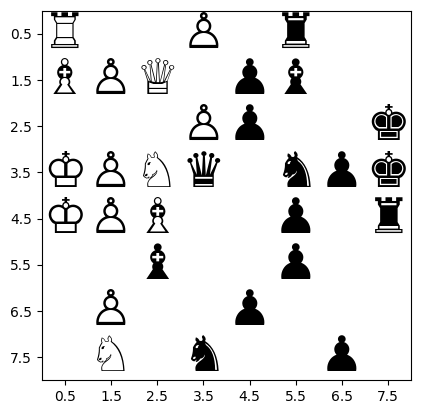

In [ ]:
# Create empty chess board
board = np.empty((8, 8), dtype=str)
board = np.asarray(board_FEN)
# Map piece names to Unicode symbols
pieces = {
    'r': '♜',
    'n': '♞',
    'b': '♝',
    'q': '♛',
    'k': '♚',
    'p': '♟',
    'R': '♖',
    'N': '♘',
    'B': '♗',
    'Q': '♕',
    'K': '♔',
    'P': '♙',
}

import matplotlib.pyplot as plt

# Set up board colors
colors = ['white', 'saddlebrown']
cmap = plt.matplotlib.colors.ListedColormap(colors)

# Set up font size
font_size = 35

# Create figure and axis
fig, ax = plt.subplots()

# Plot board
ax.imshow(np.zeros((8, 8)), cmap=cmap, extent=(0, 8, 0, 8))

# Plot pieces
for i in range(8):
    for j in range(8):
        if board[i, j] != '1':
            ax.text(j + 0.5, i + 0.5, pieces[board[i, j]], ha='center', va='center', fontsize=font_size)

# Set axis limits and ticks
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.set_xticks(np.arange(0.5, 8.5, 1))
ax.set_yticks(np.arange(0.5, 8.5, 1))
ax.invert_yaxis()

# Show plot
plt.show()

